## Tweet Sentiment Analysis 
### By Suba Shree V S (18 5001 171)

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv", encoding="latin-1")
test = pd.read_csv("test.csv", encoding="latin-1")

In [24]:
#out = pd.concat([test["UserName"], train["Sentiment"].random(3798)], axis=1)

#out
#out.to_csv("output.csv", index=False)



AttributeError: 'Series' object has no attribute 'random'

In [8]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...


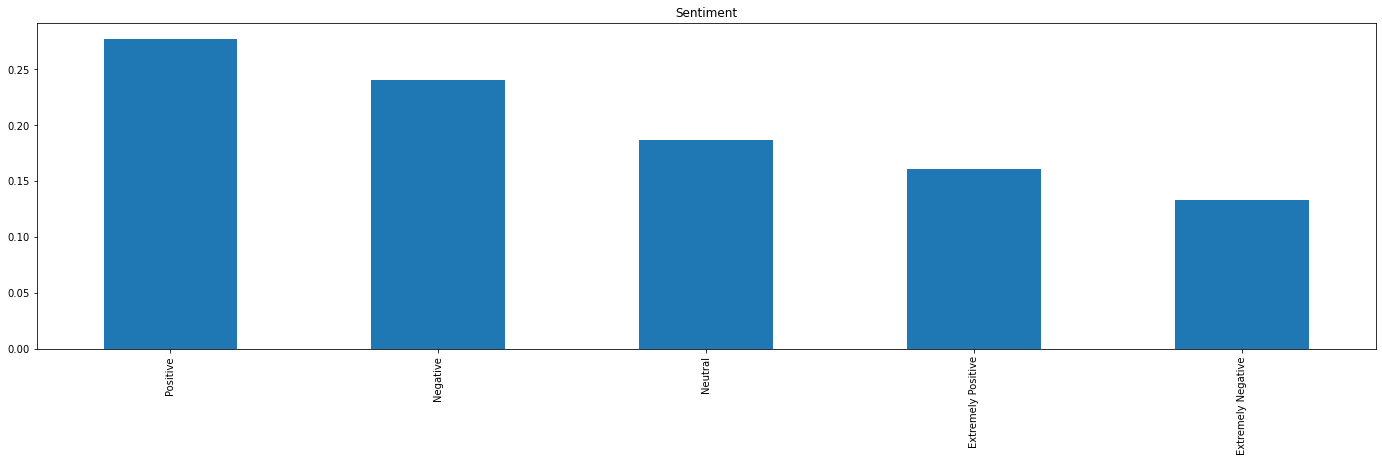

In [10]:
train['Sentiment'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Sentiment')
plt.show()

In [21]:
train['Location'].value_counts()

London                       540
United States                528
London, England              520
New York, NY                 395
Washington, DC               373
                            ... 
Jackson Hole, WY               1
The City of London             1
Milton keynes , England        1
Saratoga Springs, NY           1
Anywhere There's Internet      1
Name: Location, Length: 12220, dtype: int64

In [12]:
'''#Encoding
for i in train['Sentiment']:
    if(i == 'Positive'):
        train['Sentiment'] = 1
    elif(i == 'Extremely Positive'):
        train['Sentiment'] = 2
    elif (i == 'Negative'):
        train['Sentiment'] = -1
    elif(i == "Extremely Negative"):
        train['Sentiment'] = -2
    else:
        train['Sentiment'] = 0'''

'#Encoding\nfor i in train[\'Sentiment\']:\n    if(i == \'Positive\'):\n        train[\'Sentiment\'] = 1\n    elif(i == \'Extremely Positive\'):\n        train[\'Sentiment\'] = 2\n    elif (i == \'Negative\'):\n        train[\'Sentiment\'] = -1\n    elif(i == "Extremely Negative"):\n        train[\'Sentiment\'] = -2\n    else:\n        train[\'Sentiment\'] = 0'

In [13]:
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

## Data Cleaning

In [14]:
#install tweet-preprocessor to clean tweets
#!pip install tweet-preprocessor

In [15]:

# remove special characters using the regular expression library
import re

#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [16]:
import preprocessor as p

# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr


In [17]:
# clean training data
train_tweet = clean_tweets(train["OriginalTweet"])
train_tweet = pd.DataFrame(train_tweet)

In [19]:
train["clean_tweet"] = train_tweet

# compare the cleaned and uncleaned tweets
train.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outbr...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,as news of the regions first confirmed covid 1...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cashier at grocery store was sharing his insig...
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,was at the supermarket today didnt buy toilet ...
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,due to covid 19 our retail store and classroom...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,for corona preventionwe should stop to buy thi...


In [20]:
# clean the test data and append the cleaned tweets to the test data
test_tweet = clean_tweets(test["OriginalTweet"])
test_tweet = pd.DataFrame(test_tweet)
# append cleaned tweets to the training data
test["clean_tweet"] = test_tweet

# compare the cleaned and uncleaned tweets
test.tail(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,clean_tweet
3788,3789,48741,Pakistan,16-03-2020,You never eaten the pigs cat dog or food from ...,you never eaten the pigs cat dog or food from ...
3789,3790,48742,"California, USA",16-03-2020,@calebmealer @thebradfordfile @realDonaldTrump...,very true china has done a great job of more t...
3790,3791,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",even though the law library is closed all subs...
3791,3792,48744,Washington D.C.,16-03-2020,"With Gov Hogan's announcement that all bars, r...",with gov hogans announcement that all bars res...
3792,3793,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",craig will you call on the general assembly to...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,meanwhile in a supermarket in israel people...
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,did you panic buy a lot of non perishable item...
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,asst prof of economics was on talking about he...
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,gov need to do somethings instead of biar je r...
3797,3798,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to...,i and members are committed to the safety of o...


## Encoding categorical Sentiments

In [16]:
from sklearn import preprocessing
labelencoder_X = preprocessing.LabelEncoder()

In [17]:
 train["Sentiment"] = labelencoder_X.fit_transform(train["Sentiment"].astype(str))

In [18]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,4,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,4,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,4,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,me ready to go at supermarket during the outbr...


## Splitting Data into Train and Test

In [19]:
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = train.Sentiment.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(train.clean_tweet.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

## Vectorizing Tweets

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
documents = ["This is Import Data's Youtube channel",
             "Data science is my passion and it is fun!",
             "Please subscribe to my channel"]

# initializing the countvectorizer
vectorizer = CountVectorizer()

# tokenize and make the document into a matrix
document_term_matrix = vectorizer.fit_transform(documents)

# check the result
pd.DataFrame(document_term_matrix.toarray(), columns = vectorizer.get_feature_names())

,and,channel,data,fun,import,is,it,my,passion,please,science,subscribe,this,to,youtube
0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1
1,1,0,1,1,0,2,1,1,1,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


In [102]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

<28809x40739 sparse matrix of type '<class 'numpy.int64'>'
	with 402974 stored elements in Compressed Sparse Row format>

## Building Model

In [23]:
from sklearn import svm

In [24]:
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

In [25]:
# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

In [26]:
# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)

In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  63.64593456430191 %


In [113]:
y_pred_svm

array([4, 1, 3, ..., 4, 3, 3])

## Predicting for the test dataset

In [109]:
test_vec = vectorizer.transform(test)
test_vec

<6x40739 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [114]:
test_pred = svm.predict(test_vec)